## PassThrough Filter

본 챕터에서는 RoI 추출 방법 중 하나인 PassThrough Filter에 대하여 다루고 있습니다. 

PassThrough Filter는 입력값으로 관심 영역의 x,y,z의 최대/최소값을 받아 crop하는 방식으로, 직관적이지만 정교한 부분을 제거하지는 못하는 단점이 있습니다. 

자세한 내용은 [Filtering a PointCloud using a PassThrough filter](http://pointclouds.org/documentation/tutorials/passthrough.php#passthrough)를 참고 하시면 됩니다.  


In [1]:
%load_ext watermark
%watermark -d -v -p pcl,numpy

2018-11-23 

CPython 3.5.2
IPython 6.4.0

pcl unknown
numpy 1.14.5


In [2]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import pcl
import numpy as np

import os
os.chdir("/workspace/3D_People_Detection_Tracking") 

In [9]:
from include.visualization_helper import *
%matplotlib inline

## PassThough Filter 정의

입력 
- pcl_data : point cloud
- filter_axis : 제거할 축 (x or y or z)
- axis_min : 최소 크기
- axis_max : 최대 크기

출력  
- point cloud

In [10]:
def do_passthrough(pcl_data,filter_axis,axis_min,axis_max):
    '''
    Create a PassThrough  object and assigns a filter axis and range.
    :param pcl_data: point could data subscriber
    :param filter_axis: filter axis
    :param axis_min: Minimum  axis to the passthrough filter object
    :param axis_max: Maximum axis to the passthrough filter object
    :return: passthrough on point cloud
    :https://github.com/fouliex/RoboticPerception
    '''
    passthrough = pcl_data.make_passthrough_filter()
    passthrough.set_filter_field_name(filter_axis)
    passthrough.set_filter_limits(axis_min, axis_max)
    return passthrough.filter()

## PCD 파일 읽기

In [17]:
cloud = pcl.load("./sample/lobby.pcd") # Deprecated; use pcl.load instead.
print(cloud)

<PointCloud of 19329 points>


(x) : 92.2m
(y) : 87.5m
(z) : 10.3m


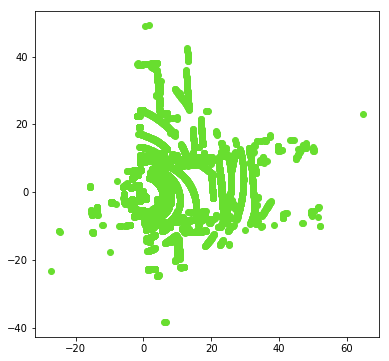

In [18]:
visualization2D_xyz(cloud.to_array())

## PassThough Filter 수행

In [19]:
filter_axis = 'x'
axis_min = 1.0
axis_max = 20.0
cloud = do_passthrough(cloud, filter_axis, axis_min, axis_max)

(x) : 19.0m
(y) : 87.5m
(z) : 8.7m


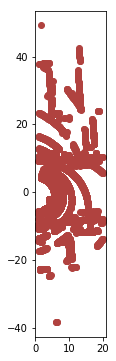

In [20]:
visualization2D_xyz(cloud.to_array())

In [22]:
filter_axis = 'y'
axis_min = -7.0
axis_max = 5.5
cloud = do_passthrough(cloud, filter_axis, axis_min, axis_max)

(x) : 19.0m
(y) : 12.5m
(z) : 2.3m


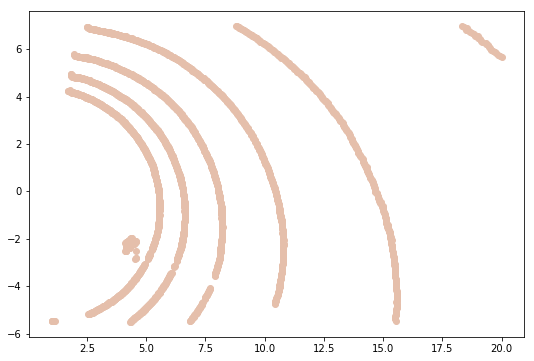

In [23]:
visualization2D_xyz(cloud.to_array())

(x) : 19.0m
(y) : 12.5m
(z) : 2.3m


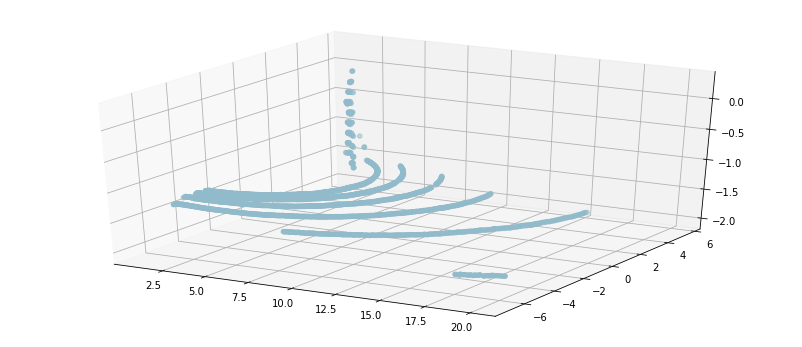

In [25]:
visualization3D_xyz(cloud.to_array())

In [27]:
filter_axis = 'z'
axis_min = -1.2
axis_max = 10.0
cloud = do_passthrough(cloud, filter_axis, axis_min, axis_max)

(x) : 2.7m
(y) : 9.8m
(z) : 1.5m


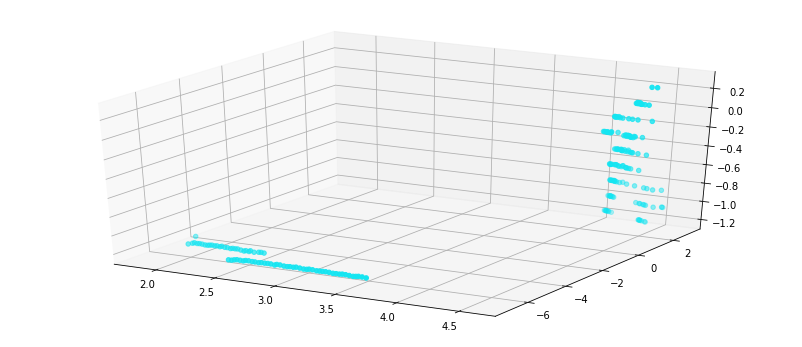

In [28]:
visualization3D_xyz(cloud.to_array())

> PassThrough필터의 z축 필터링을 통해서 바닥제거도 가능합니다. 
> 단, Lidar가 기울어져있으면 근거리와 원거리의 z값이 다르기 때문에 설치시 조심해야 합니다. 